# Instalação das bibiliotecas necessárias

In [34]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\jeanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importação das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define o scaler para normalização
scaler = MinMaxScaler()

# Define locale para português do Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

## Importação e análise exploratória

In [3]:
# Criação de um DataFrame Pandas a partir de um arquivo Parquet
df = pd.read_parquet('./data/yellow_tripdata_2025-01.parquet')

In [4]:
# Exibição das primeiras linhas do DataFrame
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [5]:
# Número de linhas e colunas do DataFrame
linhas = locale.format_string('%d', df.shape[0], grouping=True)
colunas = locale.format_string('%d', df.shape[1], grouping=True)
print(f"Linhas: {linhas}, Colunas: {colunas}")

Linhas: 3.475.226, Colunas: 20


In [6]:
# Tipos de dados de cada coluna
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
cbd_congestion_fee              float64
dtype: object

In [7]:
# Dados faltantes
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
cbd_congestion_fee            0
dtype: int64

In [8]:
# Estatística dos dados faltantes em relação ao total de dados
df.isnull().sum() / df.shape[0] * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count          15.542845
trip_distance             0.000000
RatecodeID               15.542845
store_and_fwd_flag       15.542845
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge     15.542845
Airport_fee              15.542845
cbd_congestion_fee        0.000000
dtype: float64

In [9]:
# Identificando outliers de algumas colunas
df[['passenger_count', 'trip_distance', 'total_amount', 'tip_amount']].describe()

,passenger_count,trip_distance,total_amount,tip_amount
count,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06
mean,1.297859e+00,5.855126e+00,2.561129e+01,2.959813e+00
std,7.507503e-01,5.646016e+02,4.636585e+02,3.779681e+00
min,0.000000e+00,0.000000e+00,-9.010000e+02,-8.600000e+01
25%,1.000000e+00,9.800000e-01,1.520000e+01,0.000000e+00
50%,1.000000e+00,1.670000e+00,1.995000e+01,2.450000e+00
75%,1.000000e+00,3.100000e+00,2.778000e+01,3.930000e+00
max,9.000000e+00,2.764236e+05,8.633804e+05,4.000000e+02


## Filtragem dos dados

In [10]:
# Filtrar apenas registros com valores > 0 para as três variáveis
df_filtered = df[(df['passenger_count'] > 0) & 
                 (df['trip_distance'] > 0) & 
                 (df['total_amount'] > 0)]
linhas_df_filtered = locale.format_string('%d', df_filtered.shape[0], grouping=True)
print(f"Linhas antes da filtragem de valores zerados: {linhas}")
print(f"Linhas depois da filtragem de valores zerados: {linhas_df_filtered}, ({round(df_filtered.shape[0] / df.shape[0] * 100, 2)}%)")

Linhas antes da filtragem de valores zerados: 3.475.226
Linhas depois da filtragem de valores zerados: 2.817.135, (81.06%)


In [11]:
# Somente os dados com pagamento em cartão de crédito
df_credit_card = df_filtered[df_filtered['payment_type'] == 1]
linhas_credit_card = locale.format_string('%d', df_credit_card.shape[0], grouping=True)
print(f"Linhas antes da filtragem de pagamentos com cartão de crédito: {linhas_df_filtered}")
print(f"Linhas depois da filtragem de pagamentos com cartão de crédito: {linhas_credit_card}, ({round(df_credit_card.shape[0] / df.shape[0] * 100, 2)}%)")


Linhas antes da filtragem de pagamentos com cartão de crédito: 2.817.135
Linhas depois da filtragem de pagamentos com cartão de crédito: 2.405.323, (69.21%)


In [12]:
# Cópia segura do DataFrame
df_iqr = df_credit_card.copy()

# Lista das colunas numéricas de interesse
cols = ['passenger_count', 'trip_distance', 'total_amount', 'tip_amount']

# Filtra somente valores >= 0
for col in cols:
    df_iqr = df_iqr[df_iqr[col] >= 0]

# Aplicar filtro IQR para cada coluna
for col in cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

linhas_df_sem_outliers = locale.format_string('%d', df_iqr.shape[0], grouping=True)
print(f"Linhas antes da filtragem dos outliers: {linhas_df_filtered}")
print(f"Linhas depois da filtragem dos outliers: {linhas_df_sem_outliers}, ({round(df_iqr.shape[0] / df_credit_card.shape[0] * 100, 2)}%)")

Linhas antes da filtragem dos outliers: 2.817.135
Linhas depois da filtragem dos outliers: 1.629.232, (67.73%)


## Estatísticas

In [13]:
# Lista de variáveis numéricas a analisar
num_cols = ['passenger_count', 'trip_distance', 'total_amount', 'tip_amount']

def describe_with_iqr(df, nome_df):
    print(f"\n{'='*60}")
    print(f"Estatísticas para: {nome_df}")
    print(f"{'='*60}")
    for col in num_cols:
        serie = df[col]
        q1 = serie.quantile(0.25)
        q3 = serie.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(serie < lower_bound) | (serie > upper_bound)].shape[0]

        print(f"\n Variável: {col}")
        print(f"  Média           : {serie.mean():.2f}")
        print(f"  Mediana         : {serie.median():.2f}")
        print(f"  Desvio Padrão   : {serie.std():.2f}")
        print(f"  Mínimo          : {serie.min():.2f}")
        print(f"  Q1 (25%)        : {q1:.2f}")
        print(f"  Q3 (75%)        : {q3:.2f}")
        print(f"  IQR             : {iqr:.2f}")
        print(f"  Máximo          : {serie.max():.2f}")
        print(f"  Outliers (IQR)  : {outliers} casos")

# Chamada para o dataframe original
describe_with_iqr(df_credit_card, "Antes da remoção de outliers")

# Chamada para o dataframe pós-tratamento
describe_with_iqr(df_iqr, "Depois da remoção de outliers")



Estatísticas para: Antes da remoção de outliers

 Variável: passenger_count
  Média           : 1.30
  Mediana         : 1.00
  Desvio Padrão   : 0.73
  Mínimo          : 1.00
  Q1 (25%)        : 1.00
  Q3 (75%)        : 1.00
  IQR             : 0.00
  Máximo          : 9.00
  Outliers (IQR)  : 470092 casos

 Variável: trip_distance
  Média           : 3.23
  Mediana         : 1.65
  Desvio Padrão   : 47.01
  Mínimo          : 0.01
  Q1 (25%)        : 1.00
  Q3 (75%)        : 3.00
  IQR             : 2.00
  Máximo          : 44730.30
  Outliers (IQR)  : 310111 casos

 Variável: total_amount
  Média           : 27.95
  Mediana         : 20.99
  Desvio Padrão   : 21.51
  Mínimo          : 1.87
  Q1 (25%)        : 16.38
  Q3 (75%)        : 28.95
  IQR             : 12.57
  Máximo          : 969.05
  Outliers (IQR)  : 264721 casos

 Variável: tip_amount
  Média           : 4.10
  Mediana         : 3.16
  Desvio Padrão   : 3.83
  Mínimo          : 0.00
  Q1 (25%)        : 2.11
  Q3 (75%)  

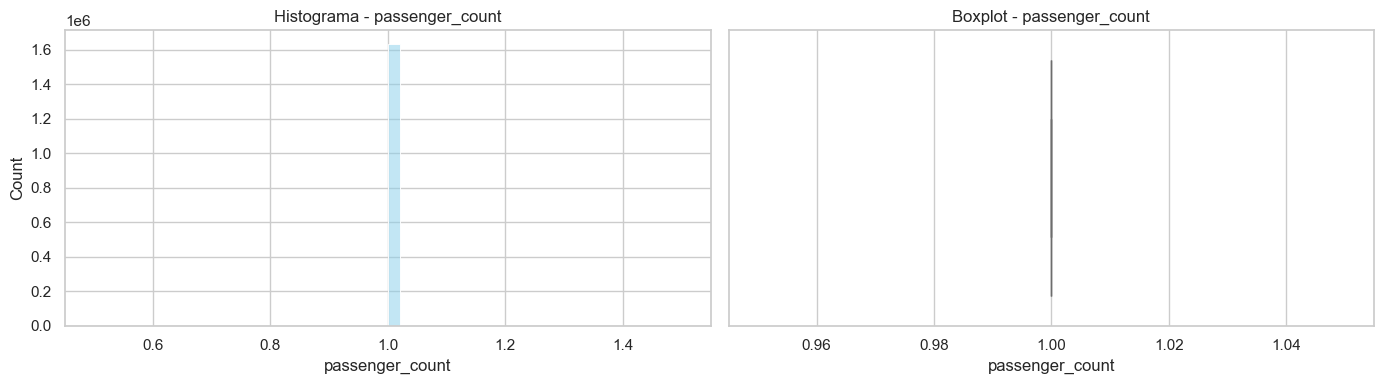

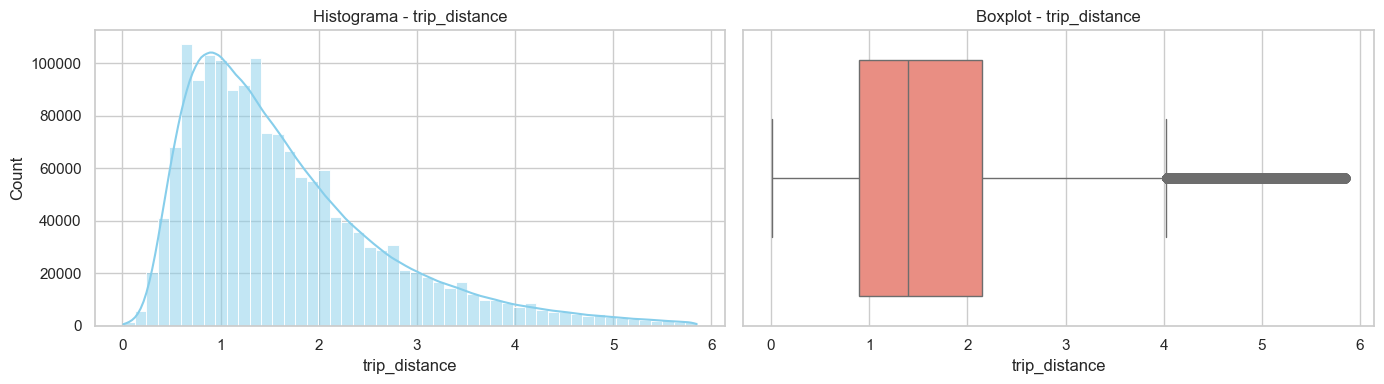

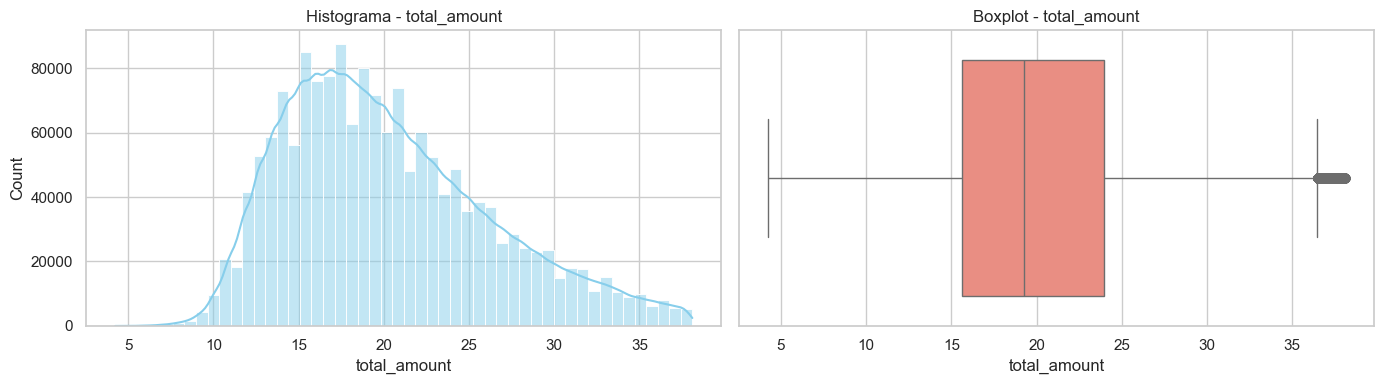

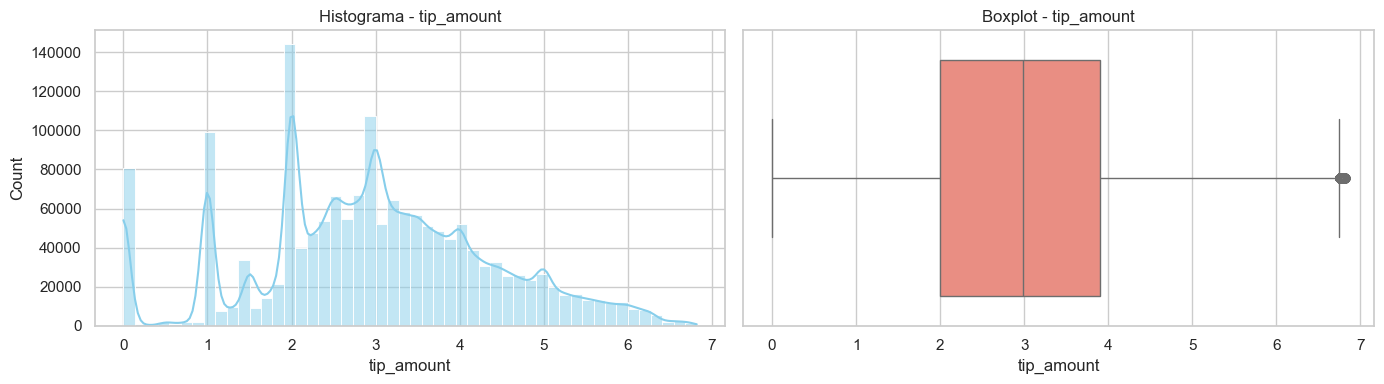

In [14]:
# Define o estilo
sns.set_theme(style="whitegrid")

# Gera histogramas e boxplots lado a lado
for col in cols:
    plt.figure(figsize=(14, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df_iqr[df_iqr[col] >= 0][col], bins=50, kde=True, color='skyblue')
    plt.title(f'Histograma - {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_iqr[df_iqr[col] >= 0][col], color='salmon')
    plt.title(f'Boxplot - {col}')

    plt.tight_layout()
    plt.show()


In [15]:
# Cópia segura do DataFrame
df_iqr = df.copy()

# Lista das colunas numéricas de interesse
cols = ['passenger_count', 'trip_distance', 'total_amount', 'tip_amount']

# Filtra somente valores >= 0
for col in cols:
    df_iqr = df_iqr[df_iqr[col] >= 0]

# Aplicar filtro IQR para cada coluna
for col in cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

# Resultado: df_iqr sem outliers
print(f"Linhas após remoção de outliers: {locale.format_string('%d', df_iqr.shape[0], grouping=True)}")

Linhas após remoção de outliers: 1.921.661


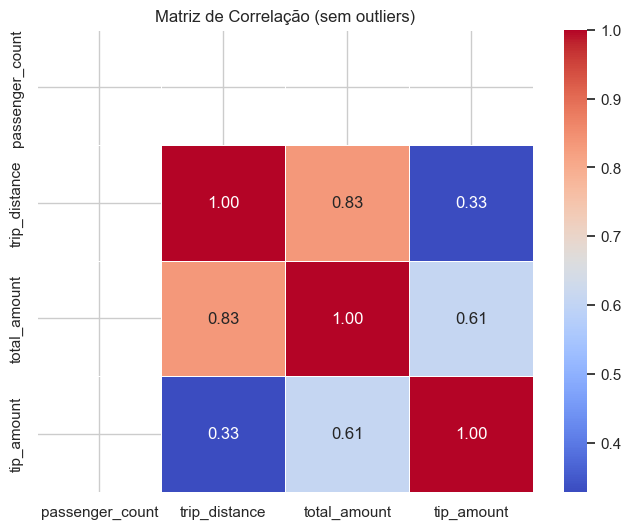

In [16]:
# Correlação de Pearson nos dados sem outliers
corr_iqr = df_iqr[cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_iqr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (sem outliers)')
plt.show()


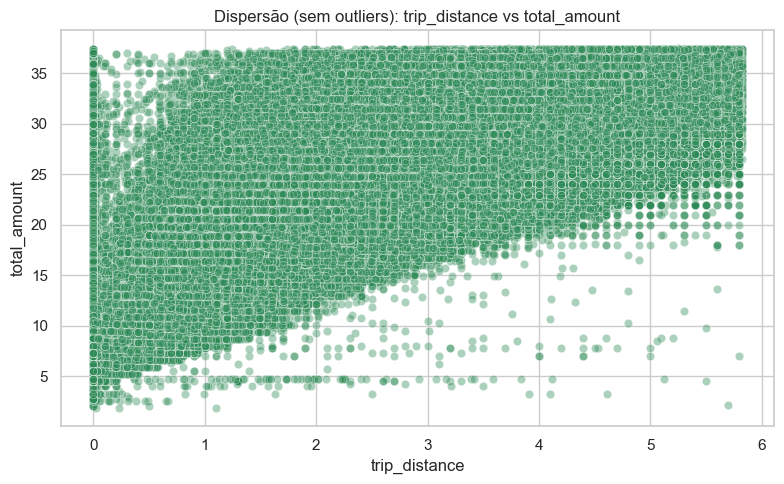

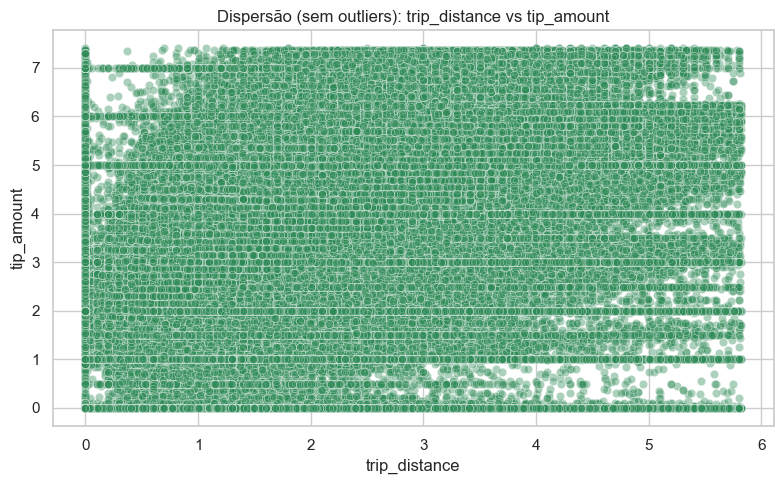

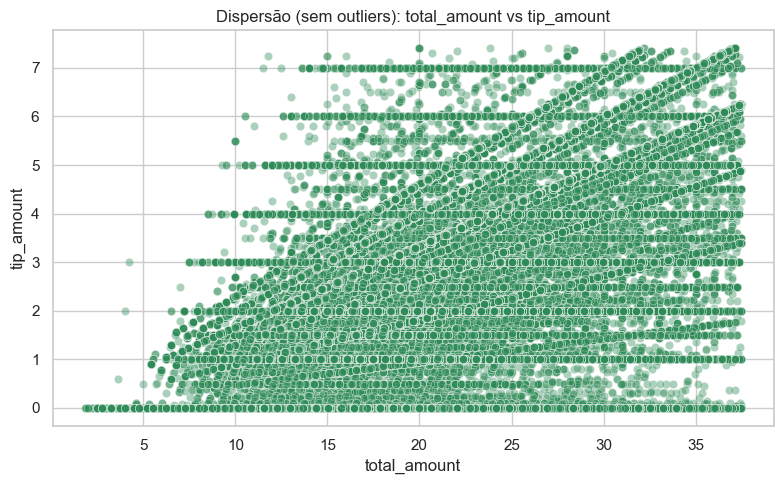

In [17]:
# Pares de colunas para scatterplots
scatter_pairs = [
    ('trip_distance', 'total_amount'),
    ('trip_distance', 'tip_amount'),
    ('total_amount', 'tip_amount')
]

# Gera scatterplots com dados sem outliers
for x_col, y_col in scatter_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=df_iqr,
        x=x_col,
        y=y_col,
        alpha=0.4,
        color='seagreen'
    )
    plt.title(f'Dispersão (sem outliers): {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()


## Transformações

In [18]:
# Garantindo que os campos estejam em formato datetime
df_iqr['tpep_pickup_datetime'] = pd.to_datetime(df_iqr['tpep_pickup_datetime'])
df_iqr['tpep_dropoff_datetime'] = pd.to_datetime(df_iqr['tpep_dropoff_datetime'])

# Extrações temporais
df_iqr['pickup_hour'] = df_iqr['tpep_pickup_datetime'].dt.hour
df_iqr['pickup_weekday'] = df_iqr['tpep_pickup_datetime'].dt.weekday
df_iqr['pickup_month'] = df_iqr['tpep_pickup_datetime'].dt.month


In [19]:
# Calcula duração da corrida em minutos
df_iqr['trip_duration'] = (df_iqr['tpep_dropoff_datetime'] - df_iqr['tpep_pickup_datetime']).dt.total_seconds() / 60


In [20]:
# Adiciona colunas log-transformadas (com 1 somado para evitar log(0))
df_iqr['log_fare_amount'] = np.log1p(df_iqr['fare_amount'])
df_iqr['log_tip_amount'] = np.log1p(df_iqr['tip_amount'])


In [21]:
cols_to_scale = ['trip_distance', 'fare_amount', 'trip_duration', 'total_amount']

# Criação de colunas escalonadas com valores entre 0 e 1
scaled_values = scaler.fit_transform(df_iqr[cols_to_scale])
df_scaled = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in cols_to_scale])

# Concatena ao dataframe original
df_iqr = pd.concat([df_iqr, df_scaled], axis=1)

In [22]:
df_iqr.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_weekday,pickup_month,trip_duration,log_fare_amount,log_tip_amount,trip_distance_scaled,fare_amount_scaled,trip_duration_scaled,total_amount_scaled
0,1.0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229.0,237.0,1.0,...,0.0,2.0,1.0,8.350000,2.397895,1.386294,0.274914,0.272851,0.014828,0.453270
1,1.0,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236.0,237.0,1.0,...,0.0,2.0,1.0,2.550000,1.808289,1.105257,0.085911,0.139154,0.013460,0.288240
2,1.0,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141.0,141.0,1.0,...,0.0,2.0,1.0,1.950000,1.808289,1.098612,0.103093,0.139154,0.013318,0.287679
9,2.0,2025-01-01 00:00:02,2025-01-01 00:09:36,1.0,1.71,1.0,N,237.0,262.0,2.0,...,0.0,2.0,1.0,9.566667,2.517696,0.000000,0.118557,0.177353,0.013975,0.270839
10,2.0,2025-01-01 00:20:28,2025-01-01 00:28:04,1.0,2.29,1.0,N,237.0,75.0,2.0,...,0.0,2.0,1.0,7.600000,2.517696,0.000000,0.171821,0.196453,0.014069,0.341847


In [23]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2608040 entries, 0 to 1921655
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

## Modelo de Classificação (prever se haverá ou não gorjeta):
- **Regressão Logística**: Modelo linear base para classificação binária

In [33]:
# Copia do dataframe original para evitar alteração do original
df_model = df_iqr.copy()

# Criação da variável alvo binária: 1 se houver gorjeta (> 0), 0 caso contrário
df_model['has_tip'] = (df_model['tip_amount'] > 0).astype(int)

# Features numéricas já escaladas
numerical_features = ['trip_distance_scaled', 'trip_duration_scaled', 'total_amount_scaled']

# Features categóricas
categorical_features = ['PULocationID', 'pickup_hour', 'pickup_weekday', 'pickup_month']

# Junta todas as variáveis preditoras
features = numerical_features + categorical_features
X = df_model[features]
y = df_model['has_tip']


In [25]:
# Antes da remoção de NaNs
print(f"Número de linhas ANTES do dropna: {locale.format_string('%d', X.shape[0], grouping=True)}")

# Remove NaNs de X
X = X.dropna()

# Alinha y ao novo índice de X
y = y.loc[X.index]

# Depois da remoção
print(f"Número de linhas DEPOIS do dropna: {locale.format_string('%d', X.shape[0], grouping=True)}")


Número de linhas ANTES do dropna: 2.608.040
Número de linhas DEPOIS do dropna: 1.235.282


In [26]:
# Separação treino/teste 80/20 (mantendo proporção da classe com stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Separar numéricas e categóricas no treino
X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features].astype(str)

# Separar numéricas e categóricas no teste
X_test_num = X_test[numerical_features]
X_test_cat = X_test[categorical_features].astype(str)

# Inicializa TargetEncoder para as categóricas
encoder = ce.TargetEncoder(cols=categorical_features)

# Fit no treino e transforma treino e teste
X_train_cat_encoded = encoder.fit_transform(X_train_cat, y_train)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Reconstruir X_train e X_test finais, concatenando numéricas + categóricas codificadas
X_train = pd.concat([X_train_num, X_train_cat_encoded], axis=1).astype(np.float32)
X_test = pd.concat([X_test_num, X_test_cat_encoded], axis=1).astype(np.float32)


In [27]:
# Treinamento do modelo com hiperparâmetro C calibrado
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)
model.fit(X_train, y_train)

print("Melhor valor de C:", model.best_params_['C'])

Melhor valor de C: 0.01


In [28]:
# Previsão no conjunto de teste
y_pred = model.predict(X_test)

# Calcula F1-Score geral e por classe
f1 = f1_score(y_test, y_pred)
print(f"F1-Score geral: {f1:.4f}\n")

# Relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Sem Gorjeta (0)', 'Com Gorjeta (1)']))


F1-Score geral: 0.8975

Relatório de Classificação:
                 precision    recall  f1-score   support

Sem Gorjeta (0)       0.74      0.09      0.15     47841
Com Gorjeta (1)       0.82      0.99      0.90    199216

       accuracy                           0.82    247057
      macro avg       0.78      0.54      0.53    247057
   weighted avg       0.80      0.82      0.75    247057



AUC-ROC: 0.6002


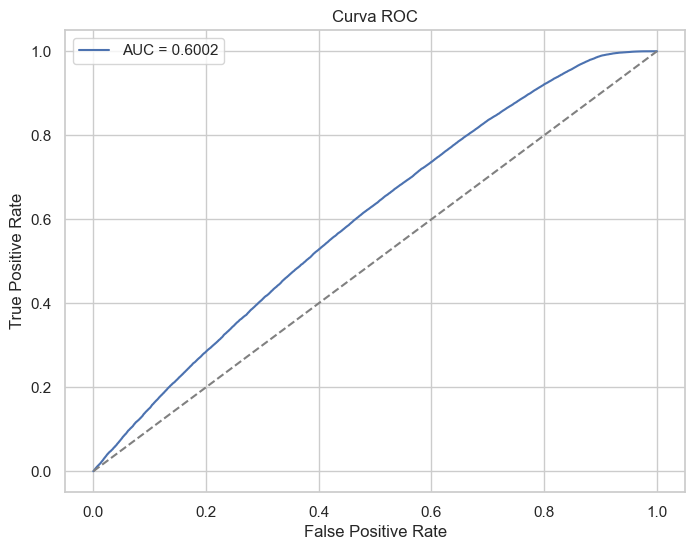

In [29]:
# Probabilidades para classe positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcula AUC-ROC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC: {auc:.4f}")

# Plot curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


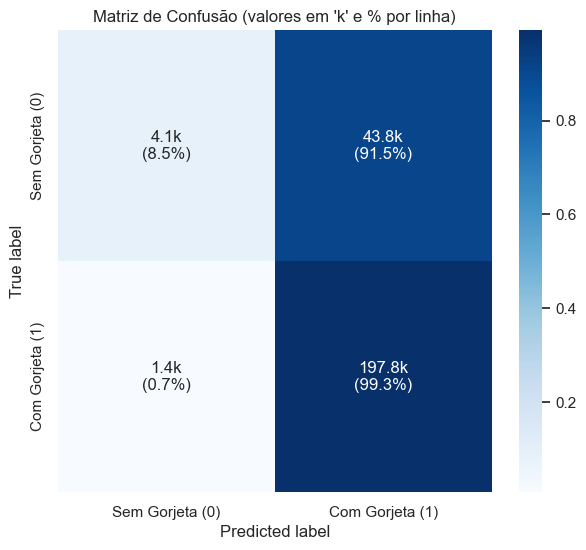

In [ ]:
# Calcula matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Normaliza por linha (true labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Função para formatar valores em milhares com 1 casa decimal, ex: 47.8k
def format_k(value):
    return f"{value/1000:.1f}k"

# Criar matriz com strings formatadas: "valor_k\n(porcentagem%)"
cm_display = np.empty(cm.shape, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        abs_val = format_k(cm[i,j])
        pct_val = f"{cm_norm[i,j]*100:.1f}%"
        cm_display[i,j] = f"{abs_val}\n({pct_val})"

# Plot da matriz formatada
plt.figure(figsize=(7,6))
sns.heatmap(cm_norm, annot=cm_display, fmt='', cmap='Blues',
            xticklabels=['Sem Gorjeta (0)', 'Com Gorjeta (1)'],
            yticklabels=['Sem Gorjeta (0)', 'Com Gorjeta (1)'])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Matriz de Confusão (valores em 'k' e % por linha)")
plt.show()


In [31]:
# Função para formatar valores em milhares com 1 casa decimal
def format_k(value):
    return f"{value/1000:.1f}k"

print("Matriz de Confusão (valores absolutos e % por linha):\n")

for i, true_label in enumerate(['Sem Gorjeta (0)', 'Com Gorjeta (1)']):
    total_true = cm[i].sum()
    print(f"True label: {true_label} (total = {format_k(total_true)})")
    for j, pred_label in enumerate(['Sem Gorjeta (0)', 'Com Gorjeta (1)']):
        abs_val = cm[i, j]
        pct_val = (abs_val / total_true) * 100
        print(f"  Predicted {pred_label}: {format_k(abs_val)} ({pct_val:.1f}%)")
    print()


Matriz de Confusão (valores absolutos e % por linha):

True label: Sem Gorjeta (0) (total = 47.8k)
  Predicted Sem Gorjeta (0): 4.1k (8.5%)
  Predicted Com Gorjeta (1): 43.8k (91.5%)

True label: Com Gorjeta (1) (total = 199.2k)
  Predicted Sem Gorjeta (0): 1.4k (0.7%)
  Predicted Com Gorjeta (1): 197.8k (99.3%)

